# Ejemplo 3: Series de tiempo

## Descripción
En este ejemplo, crearemos una serie temporal simple que representa la cantidad de ventas diarias de un producto a lo largo del tiempo.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
# Crear una serie temporal simple de ventas diarias (como ejemplo)
np.random.seed(0)
n_days = 100
sales = np.random.randint(50, 200, size=n_days) + np.arange(n_days)
date_range = pd.date_range(start='2022-01-01', periods=n_days, freq='D')

# Crear un DataFrame
df = pd.DataFrame({'Date': date_range, 'Sales': sales})
df

,Date,Sales
0,2022-01-01,97
1,2022-01-02,168
2,2022-01-03,119
3,2022-01-04,156
4,2022-01-05,63
...,...,...
95,2022-04-06,283
96,2022-04-07,260
97,2022-04-08,190
98,2022-04-09,275


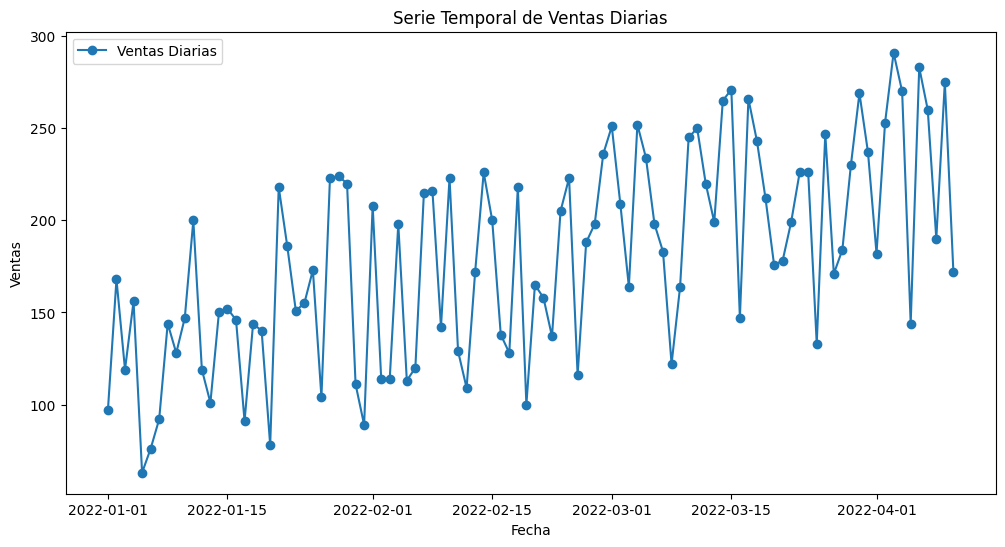

In [121]:
# Visualizar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], label='Ventas Diarias', marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Serie Temporal de Ventas Diarias')
plt.legend()
plt.show()

In [123]:
# Crear una característica de días desde el inicio
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
df

,Date,Sales,Days
0,2022-01-01,97,0
1,2022-01-02,168,1
2,2022-01-03,119,2
3,2022-01-04,156,3
4,2022-01-05,63,4
...,...,...,...
95,2022-04-06,283,95
96,2022-04-07,260,96
97,2022-04-08,190,97
98,2022-04-09,275,98


In [124]:
# Dividir el conjunto de datos en entrenamiento y prueba
X = df[['Days']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Crear y entrenar un modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [126]:
# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(X_test)

In [127]:
# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

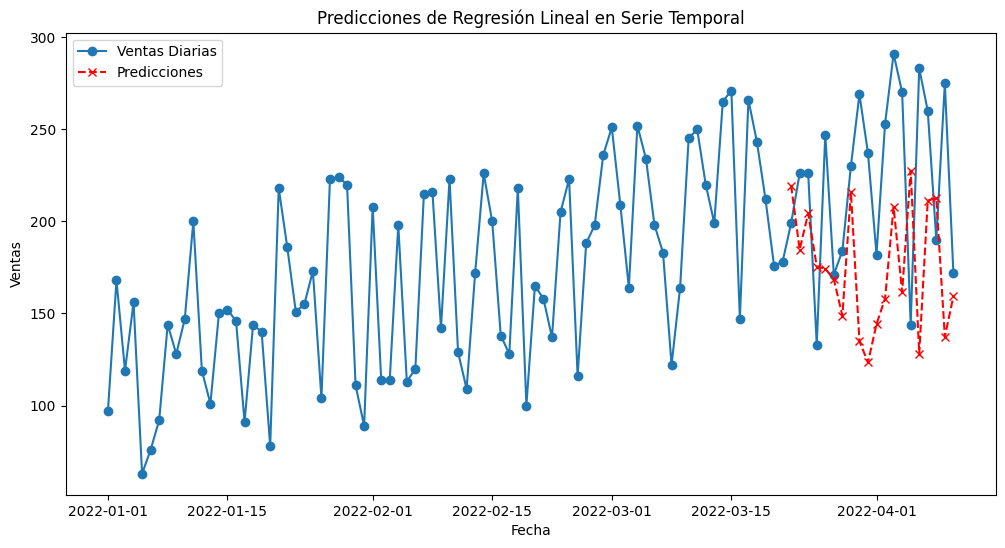

MSE en conjunto de prueba: 1968.0868790436666
R^2 en conjunto de prueba: 0.3755395953105136


In [128]:
# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], label='Ventas Diarias', marker='o', linestyle='-')
plt.plot(df['Date'][len(X_train):], y_pred, label='Predicciones', marker='x', linestyle='--', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Predicciones de Regresión Lineal en Serie Temporal')
plt.legend()
plt.show()

# Imprimir los resultados
print("MSE en conjunto de prueba:", mse)
print("R^2 en conjunto de prueba:", r2)